In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
data = pd.read_csv('./data/bmi_500.csv')
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [3]:
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [4]:
data.index = data.Label

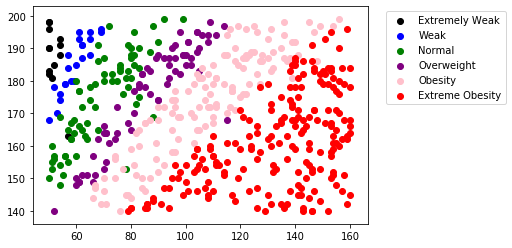

In [5]:
def easy_scatter(label, color):
    t = data.loc[label]
    plt.scatter(t['Weight'], t['Height'], c=color, label=label)

easy_scatter('Extremely Weak', 'black')
easy_scatter('Weak', 'blue')
easy_scatter('Normal', 'green')
easy_scatter('Overweight', 'purple')
easy_scatter('Obesity', 'pink')
easy_scatter('Extreme Obesity', 'red')
plt.legend(bbox_to_anchor=(1.04, 1), ncol=1)
plt.show();

### 비만도 모델 학습

In [6]:
data = pd.read_csv('./data/bmi_500.csv')

X = data.iloc[:, 1:3]
y = data['Label']

# 데이터 랜덤 셔플해서 train, test split(7:3)
np.random.seed(1234)
indice = np.arange(len(X))
np.random.shuffle(indice)
train_cnt = int(len(X) * 0.7)

X_train = X.iloc[indice[:train_cnt], :]
y_train = y[indice[:train_cnt]]
X_test = X.iloc[indice[train_cnt:], :]
y_test = y[indice[train_cnt:]]

In [7]:
mod = KNeighborsClassifier(n_neighbors=9)
mod.fit(X_train, y_train)
pred = mod.predict(X_test)
print('정확도:', metrics.accuracy_score(y_test, pred))

정확도: 0.9
